In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd

In [ ]:
### 유방암 환자 데이터셋 로드 
### sklearn의 내장 dataset 활용

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.data # array형태로 들어가 있음

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer.target_names #[악성, 양성]

array(['malignant', 'benign'], dtype='<U9')

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
# feature(X), target(y), feature_names 분리
# sklearn에 dict 타입으로 들어가 있다. 
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']
# 필요한 데이터 값만 뽑아내는 것

In [9]:
data # 2차원 array형태로 들어가 있다. 

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
# DataFrame으로 생성

df = pd.DataFrame(data=data, columns = feature_names) # X 값
df['target'] = cancer['target'] # dt에 target 값이 있으면 덮어씌우고 없으면 caner에 target값을 넣어준다.  # y 값
# 이런 것을 하고 난 후 값이 잘 들어 갔는지 확인 해봐야 한다. 

In [14]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
df_pos = df.loc[df['target']==1] # loc 할 때 조건이 참인 것만 뽑아 준다. (양성종양 - 착한 종양)
df_neg = df.loc[df['target']==0] # (악성종양 - 나쁜 종양)

In [17]:
# 편향 우리가 목표로 하는 값이 특징값을 잘 나타낼 수 있도록 데이터 값을 편향되지 않게 주어야 한다. 
# ex) 고양이 강아지 구분하는 데이터 값을 줄 때 고양이 데이터를 더 많이 주면 고양이로 판단하는 편향이 발생할 수 있다. 

In [18]:
df_pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [19]:
df_pos.shape

(357, 31)

In [20]:
df_neg.shape

(212, 31)

In [21]:
df_pos.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [22]:
df_neg[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
df_sample = pd.concat([df_pos, df_neg[:5]], sort = True)
# concat 함수는 데이터의 속성 형태가 동일한 데이터 셋끼리 합칠 때 사용 
# sort : join 이 'outer'일 때 아직 정렬되지 않은 경우 비연결 축을 정렬 합니다.


In [25]:
X = df_sample.drop('target', axis = 1) # 입력값 
y = df_sample['target'] # 이것에 해당하는 정답값 target값으로 들어가 있다. 
# 변수에 값을 알려주어야 하기 떄문에 X, y를 구분하여 넣어주는 것이다. 


In [ ]:
# axis = 1:  행  axis = 0 : 열 방향으로 수행

In [ ]:
# dataset에서 x, y를 분류한 다음에 학습 데이터와 test데이터를 분류한 것이다. 
# 예측값과 정답값을 비교해야 하기 때문에(예측을 제대로 했는지 확인하려고) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, shuffle = True)

In [ ]:
# X_train, y_train 학습 데이터로 이 값의 예측치 predict이 나오면 
# X_test, y_test 와 비교 

In [ ]:
# shuffle: bool, default = True
# 분할하기 전에 데이터를 섞을지 여부입니다. shuffle=False이면 stratify는 None이어야 합니다.

In [ ]:
# train_size float 또는 int, 기본값=없음
#float인 경우 0.0에서 1.0 사이여야 하며 기차 분할에 포함할 데이터 세트의 비율을 나타냅니다.
#int인 경우 기차 샘플의 절대 수를 나타냅니다. None이면 값이 자동으로 테스트 크기의 보수로 설정됩니다.

## 모델 정의 및 모델 학습

In [31]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(max_depth = 5)
model_dtc.fit(X_train, y_train) # fit 으로  데이터 학습, ()에 들어가는 순서도 중요하다.

DecisionTreeClassifier(max_depth=5)

In [32]:
# 그 다음은 위에 데이터가 제대로 학습이 되는지 확인

In [33]:
pred_y = model_dtc.predict(X_test)
pred_y  # 변수 명을 저장할 때 무엇을 넣었는지 확인이 가능하도록 입력하는게 좋다. 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [35]:
(pred_y == y_test).mean() # () 괄호안에 들어있는 함수는 먼저 실행하고 거기에 대한 mean값을 출력

0.989010989010989

In [36]:
pred_temp = np.ones(shape = y_test.shape)
pred_temp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

정확도 
confusion maxtix(오차 행렬, 혼동 행렬)

In [42]:
# confusion_matrix 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_y) # (target값, 예측결과값)

array([[ 0,  1],
       [ 0, 90]])

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

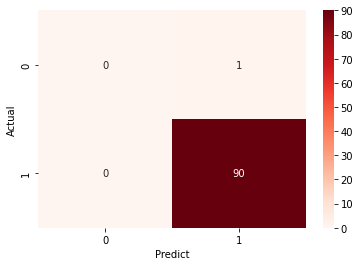

In [45]:
sns.heatmap(confusion_matrix(y_test, pred_y), annot = True, cmap = 'Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')

plt.show()

정밀도, 재현율, f1-score

정밀도 (precision)

예측을 Positive로 한 대상 중에 예측과 실제 값치 Positive로 일치한 데이터의 비율.

Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측 정확도 라고 함.

정밀도 = TP / (TP + FP)

In [46]:
from sklearn.metrics import precision_score, recall_score

In [47]:
precision_score(y_test, pred_y)

0.989010989010989

In [48]:
90/91

0.989010989010989

## 재현율

실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
정확하게 감지한 양성 샘플의 비율

민감도 (sensitivity) 혹은 TRP(True Positive Rate) 이라고도 함.
재현율 = TP / (TP + FN)

In [50]:
recall_score(y_test, pred_y)

1.0

In [51]:
90/90

1.0

## f1 score

정밀도와 재현율의 조화 평균을 나타내는 지표 
조화평균: 평균적인 변화율 계산, 공식(2ab/a+b)

In [52]:
from sklearn.metrics import f1_score

In [53]:
f1 = f1_score(y_test, pred_y)

In [54]:
print('f1 스코어: (0:.4f)'.format(f1))

f1 스코어: (0:.4f)


In [57]:
from sklearn.metrics import classification_report 
pred_y = model_dtc.predict(X_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        90

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91



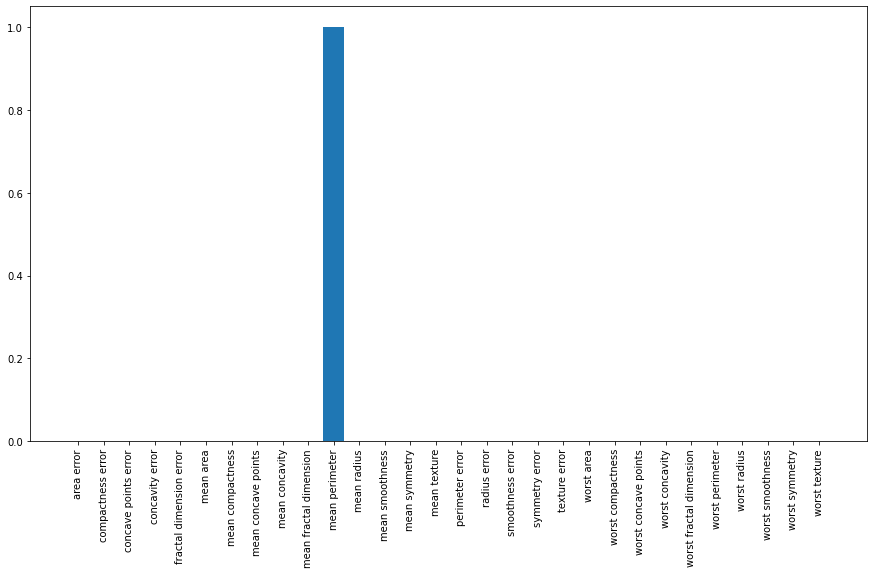

In [59]:
fig = plt.figure(figsize = (15,8))
plt.bar(X.columns, model_dtc.feature_importances_)
plt.xticks(rotation =90)
plt.show()